# Convolutional Neural Network for Image Classification

Import the necessary libraries

In [1]:
import os
import shutil
from shutil import unpack_archive
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
from functions import *
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, BatchNormalization
from sklearn.datasets import load_files
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
import sys
import keras
import csv
import pandas as pd

%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


To avoid over-crowding the virtual RAM (15GB), rather than using train-test split down the line, lets just access images from directory as oppose to storing it in memory. But before that we need to organize thed dataset folders into relevant classes. Below code aids in altering the existing data folders into train, validation and test.

In [ ]:
# unpack_archive('DATASET.zip', 'DATASET/')

# recyclable_source = 'DATASET/DATASET-2/TRAIN/R'
# recyclable_destination = 'DATASET/DATASET-2/VAL/R'

# organic_source = 'DATASET/DATASET-2/TRAIN/O'
# organic_destination = 'DATASET/DATASET-2/VAL/O'

# recyclable_files_total = os.listdir(recyclable_source)
# organic_files_total = os.listdir(organic_source)

# for f in recyclable_files_total:
#     if len(os.listdir('DATASET/DATASET-2/VAL/R')) < int(len(recyclable_files_total) * 0.4):
#         shutil.move(recyclable_source + '/' + f, recyclable_destination + '/' + f)
        
# for f in organic_files_total:
#     if len(os.listdir('DATASET/DATASET-2/VAL/O')) < int(len(organic_files_total) * 0.4):
#         shutil.move(organic_source + '/' + f, organic_destination + '/' + f)

# %cd DATASET/DATASET-2/VAL
# %rm -rf .ipynb_checkpoints
# %cd ~

# Constructing a Baseline Convolutional Neural Network

In [59]:
import warnings
warnings.filterwarnings('ignore')

input_shape = (150, 150, 3)

optimizer = keras.optimizers.Adam(learning_rate = 0.001)

model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1, 1), input_shape = input_shape, padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid'))

model.add(Flatten())

model.add(Dense(24, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 350464)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 24)                8411160   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 8,412,977
Trainable params: 8,412,977
Non-trainable params: 0
_________________________________________________________________


Let's now create a data generator for both training and validation dataset to feed in into the CNN model. We also normalize the RGB pixels to between 0 to 1 and passing the target size of (150 x 150 x 3); all of which should at least speed up the training process.

In [7]:
batch_size = 300

np.random.seed(0)

train_gen = ImageDataGenerator(rescale = 1. / 255)
val_gen = ImageDataGenerator(rescale = 1. / 255)

train_batches = train_gen.flow_from_directory('DATASET/DATASET-2/TRAIN', target_size = input_shape[:2], class_mode = 'binary', batch_size = batch_size, shuffle = True)
val_batches = val_gen.flow_from_directory('DATASET/DATASET-2/VAL', target_size = input_shape[:2], class_mode = 'binary', batch_size = batch_size, shuffle = False)

Found 15345 images belonging to 2 classes.
Found 7220 images belonging to 2 classes.


In [ ]:
Next, we initiate a callback variable in order to save the best model as the model iterates through each epoch

In [8]:
save_model = ModelCheckpoint('MODELS/baseline_original_best.h5', save_best_only = True, monitor = 'val_loss', mode = 'min')
# csv_logger = CSVLogger('TRAINING_LOGS/training_original.log', separator=',', append = False)

In [9]:
import warnings
warnings.filterwarnings('ignore')

model_summary = model.fit_generator(train_batches, 
                                    steps_per_epoch = round(15345 / batch_size, 0), 
                                    epochs = 30, 
                                    validation_data = val_batches,
                                    validation_steps = round(7220 / batch_size, 0), 
                                    use_multiprocessing = True,
                                    callbacks = [save_model])

Epoch 1/30
51/51 [==============================] - 276s 5s/step - loss: 0.6934 - accuracy: 0.7697 - val_loss: 0.4054 - val_accuracy: 0.8129
Epoch 2/30
51/51 [==============================] - 44s 859ms/step - loss: 0.4057 - accuracy: 0.8247 - val_loss: 0.2332 - val_accuracy: 0.8159
Epoch 3/30
51/51 [==============================] - 43s 851ms/step - loss: 0.3655 - accuracy: 0.8423 - val_loss: 0.3330 - val_accuracy: 0.8250
Epoch 4/30
51/51 [==============================] - 43s 839ms/step - loss: 0.3216 - accuracy: 0.8619 - val_loss: 0.4788 - val_accuracy: 0.8341
Epoch 5/30
51/51 [==============================] - 42s 821ms/step - loss: 0.2704 - accuracy: 0.8876 - val_loss: 0.3683 - val_accuracy: 0.8305
Epoch 6/30
51/51 [==============================] - 42s 814ms/step - loss: 0.2437 - accuracy: 0.9030 - val_loss: 0.6049 - val_accuracy: 0.8244
Epoch 7/30
51/51 [==============================] - 41s 797ms/step - loss: 0.2210 - accuracy: 0.9129 - val_loss: 1.0647 - val_accuracy: 0.8303
E

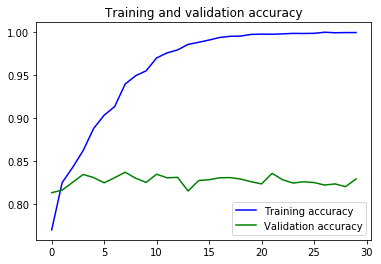

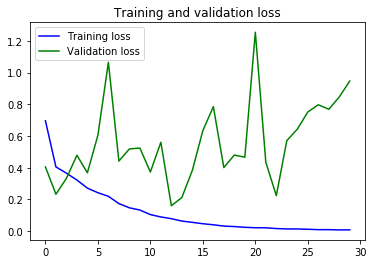

In [22]:
plot_cnn_summary(model_summary)

Found 7220 images belonging to 2 classes.
**Validation Results:** 

Accuracy Score: 0.83
Recall Score: 0.83
Specificity Score: 0.83


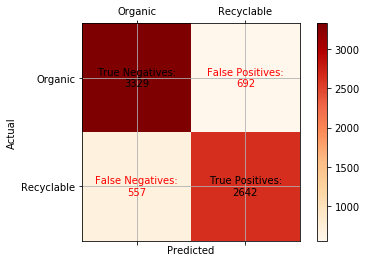

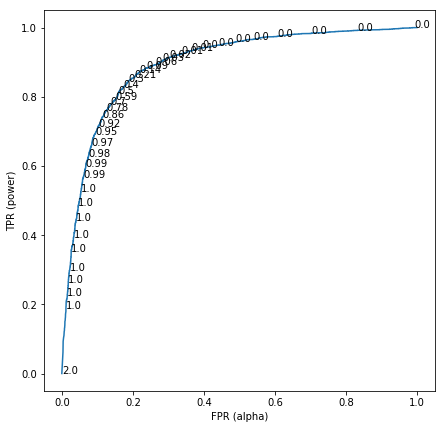

In [49]:
val_generator = ImageDataGenerator(rescale = 1 / 255)
val_batches = val_generator.flow_from_directory('DATASET/DATASET-2/VAL', 
                                                target_size = input_shape[:2], 
                                                class_mode = 'binary', 
                                                shuffle = False)

val_batches.reset()
val_probabilities = model_summary.model.predict_generator(val_batches)

from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

threshold = 0.4

y_true_val = np.array([0] * len(os.listdir('DATASET/DATASET-2/VAL/O')) + [1] * (len(os.listdir('DATASET/DATASET-2/VAL/R'))))
y_pred_val = val_probabilities > threshold
confusion_matrix = confusion_matrix(y_true_val, y_pred_val)

print('**Validation Results:** \n')
print('Accuracy Score: {}'.format(round(accuracy_score(y_true_val, y_pred_val), 2)))
print('Recall Score: {}'.format(round(recall_score(y_true_val, y_pred_val), 2)))
print('Specificity Score: {}'.format(round(confusion_matrix[0][0] / sum(confusion_matrix[0]), 2)))
plot_confusion_matrix(y_true_val, y_pred_val, 'Recyclable', 'Organic')
roc_plot(y_true_val, val_probabilities)

Found 2513 images belonging to 2 classes.
**Validation Results:** 

Accuracy Score: 0.88
Recall Score: 0.79
Specificity Score: 0.94


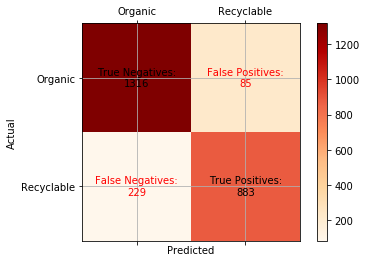

In [51]:
test_generator = ImageDataGenerator(rescale = 1 / 255)
test_batches = test_generator.flow_from_directory('DATASET/DATASET-2/TEST', 
                                                target_size = input_shape[:2], 
                                                class_mode = 'binary', 
                                                shuffle = False)

test_batches.reset()
test_probabilities = model_summary.model.predict_generator(test_batches)

from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

threshold = 0.4

y_true_test = np.array([0] * len(os.listdir('DATASET/DATASET-2/TEST/O')) + [1] * (len(os.listdir('DATASET/DATASET-2/TEST/R'))))
y_pred_test = test_probabilities > threshold
confusion_matrix = confusion_matrix(y_true_test, y_pred_test)

print('**Validation Results:** \n')
print('Accuracy Score: {}'.format(round(accuracy_score(y_true_test, y_pred_test), 2)))
print('Recall Score: {}'.format(round(recall_score(y_true_test, y_pred_test), 2)))
print('Specificity Score: {}'.format(round(confusion_matrix[0][0] / sum(confusion_matrix[0]), 2)))
plot_confusion_matrix(y_true_test, y_pred_test, 'Recyclable', 'Organic')

In [29]:
model_summary.model.save('MODELS/baseline_original_all_epochs.h5')

In [57]:
df = pd.DataFrame({key: pd.Series(value) for key, value in model_summary.history.items()})
df.to_csv('TRAINING_LOGS/baseline_original_results.csv', index = False)

In [2]:
# ADDITIONAL DEBUGGING

In [59]:
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [60]:
model = load_model('MODELS/baseline_original_all_epochs.h5')

Found 2514 images belonging to 2 classes.


/home/jupyter/.local/lib/python3.5/site-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


**Validation Results:** 

Accuracy Score: 0.88
Recall Score: 0.79
Specificity Score: 0.94


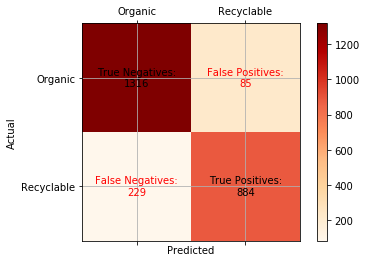

In [61]:
test_generator = ImageDataGenerator(rescale = 1. / 255)
test_batches = test_generator.flow_from_directory('DATASET/DATASET-2/TEST', 
                                                  target_size = (150,150), 
                                                  class_mode = 'binary',
                                                  color_mode = 'rgb',
                                                  shuffle = False, 
                                                  batch_size = 1)

test_batches.reset()

filenames = test_batches.filenames
nb_samples = len(filenames)

test_probabilities = model.model.predict_generator(test_batches, steps = nb_samples)

from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

threshold = 0.4

y_true_test = test_batches.classes
y_pred_test = test_probabilities > threshold
confusion_matrix = confusion_matrix(y_true_test, y_pred_test)

print('**Validation Results:** \n')
print('Accuracy Score: {}'.format(round(accuracy_score(y_true_test, y_pred_test), 2)))
print('Recall Score: {}'.format(round(recall_score(y_true_test, y_pred_test), 2)))
print('Specificity Score: {}'.format(round(confusion_matrix[0][0] / sum(confusion_matrix[0]), 2)))
plot_confusion_matrix(y_true_test, y_pred_test, 'Recyclable', 'Organic')

In [65]:
sum(test_probabilities > 0.4)

array([969])

In [70]:
filenames_organic = sorted([file for file in glob.glob('DATASET/DATASET-2/TEST/O/*.jpg')])
filenames_recyclable = sorted([file for file in glob.glob('DATASET/DATASET-2/TEST/R/*.jpg')])

test_organic = [cv2.resize(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB), (150, 150)) for file in filenames_organic]
test_recyclable = [cv2.resize(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB), (150, 150)) for file in filenames_recyclable]

test_organic = [np.expand_dims(image, axis = 0) / 255 for image in test_organic]
test_recyclable = [np.expand_dims(image, axis = 0) / 255 for image in test_recyclable]
total_test = np.concatenate(test_organic + test_recyclable, axis = 0)
predictions = model.predict_proba(total_test)

**Validation Results:** 

Accuracy Score: 0.88
Recall Score: 0.79
Specificity Score: 0.94


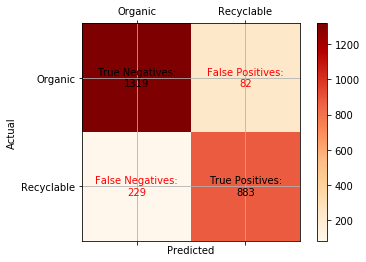

In [79]:
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

threshold = 0.4

O = len([f for f in os.listdir('DATASET/DATASET-2/TEST/O') if not f.startswith('.')])
R = len([f for f in os.listdir('DATASET/DATASET-2/TEST/R') if not f.startswith('.')])

y_true_test = np.array([0] * O + [1] * R)
y_pred_test = predictions > threshold
confusion_matrix = confusion_matrix(y_true_test, y_pred_test)

print('**Validation Results:** \n')
print('Accuracy Score: {}'.format(round(accuracy_score(y_true_test, y_pred_test), 2)))
print('Recall Score: {}'.format(round(recall_score(y_true_test, y_pred_test), 2)))
print('Specificity Score: {}'.format(round(confusion_matrix[0][0] / sum(confusion_matrix[0]), 2)))
plot_confusion_matrix(y_true_test, y_pred_test, 'Recyclable', 'Organic')

In [80]:
sum(predictions > 0.4)

array([965])

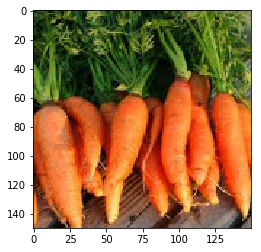

In [84]:
image_test_organic = cv2.resize(cv2.cvtColor(cv2.imread('DATASET/DATASET-2/TEST/O/O_12568.jpg'), cv2.COLOR_BGR2RGB), (150,150))
plt.imshow(image_test_organic)
plt.show()

In [85]:
image_test_organic = np.expand_dims(image_test_organic, axis = 0)
image_test_organic = image_test_organic / 255
image_proba = model.predict_proba(image_test_organic)

In [91]:
image_proba

array([[6.555728e-07]], dtype=float32)

In [87]:
test_probabilities # from flow from directory

array([[2.1243982e-07],
       [1.7263216e-06],
       [1.2298498e-02],
       ...,
       [9.9028087e-01],
       [1.0000000e+00],
       [9.9999940e-01]], dtype=float32)

In [89]:
predictions # from variable

array([[6.5556787e-07],
       [2.2026891e-06],
       [1.0286291e-02],
       ...,
       [9.7725224e-01],
       [9.8948193e-01],
       [9.9999988e-01]], dtype=float32)